In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist

In [ ]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

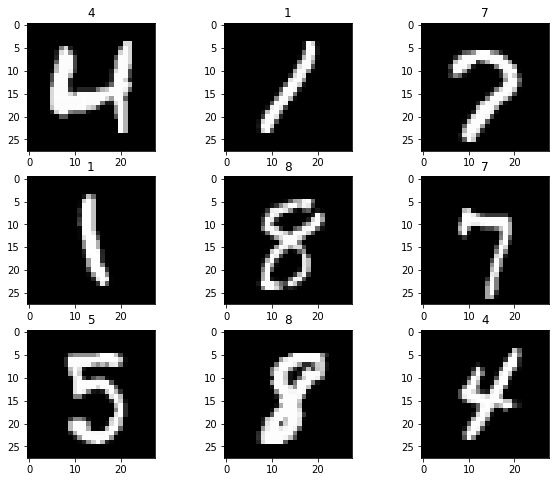

In [ ]:
plt.figure(figsize=(10,8))
np.random.seed(0)
idx = np.random.randint(0,60000,9)

for i in range(len(idx)):

  plt.subplot(3,3,i+1)
  plt.title(y_train[idx[i]])
  grid_data=np.reshape(X_train[idx[i]],(28,28))
  plt.imshow(grid_data,cmap='gray')

In [ ]:
X_train= X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255
X_train= X_train.reshape(60000,28,28,1)
X_test= X_test.reshape(10000,28,28,1)


In [ ]:
print('Class label of the first image:',y_train[0])
Y_train=np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)
print('after converting the output into a vector',Y_train[0])


Class label of the first image: 5
after converting the output into a vector [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model = None
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=20)

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 0.2050 - accuracy: 0.9379
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0790 - accuracy: 0.9766
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0605 - accuracy: 0.9816
Epoch 4/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0484 - accuracy: 0.9847
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0399 - accuracy: 0.9872
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0368 - accuracy: 0.9877
Epoch 7/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0323 - accuracy: 0.9899
Epoch 8/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0259 - accuracy: 0.9914
Epoch 9/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0242 - accuracy: 0.9925
Epoch 10/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0221 - accura

In [102]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization_3 (Batc  (None, 26, 26, 128)      512       
 hNormalization)                                                 
                                                                 
 dropout_11 (Dropout)        (None, 26, 26, 128)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_4 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 64)       

In [ ]:
prediction_score= model.evaluate(X_train,Y_train, verbose=0)
print('test loss and test accuracy',prediction_score)

test loss and test accuracy [0.0007215291261672974, 0.999833345413208]


In [ ]:
from keras.preprocessing import image


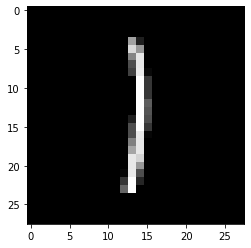

In [ ]:
plt.imshow(image.array_to_img(X_test[40]),cmap='gray')

In [ ]:
y_test[40]

1

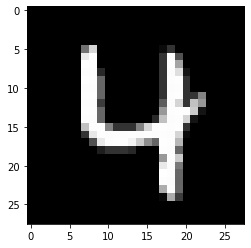

In [ ]:
plt.imshow(image.array_to_img(X_test[49]),cmap='gray')

In [ ]:
y_test[49]

4

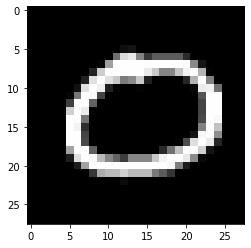

In [ ]:
plt.imshow(image.array_to_img(X_test[69]),cmap='gray')

In [ ]:
y_test[69]

0

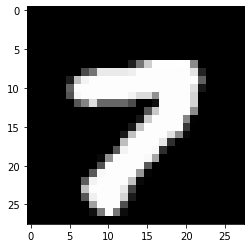

In [ ]:
plt.imshow(image.array_to_img(X_test[79]),cmap='gray')

In [ ]:
y_test[79]

7

Predicted Value:  9
Successful prediction


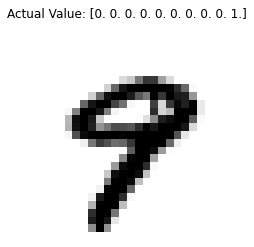

In [101]:
plt.imshow(X_test[9].squeeze(),cmap='gray_r')
plt.title('Actual Value: {}'.format(Y_test[9]))
prediction=model.predict(X_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[9]))
if(y_test[9]==(np.argmax(prediction[9]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')